In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [4]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123456",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection
    
    
# con = PostgresConnection().getConnection()    

### Common Function to fetch Data from all tables 

In [5]:
#  select_stmt= is the SQL select query along with  table and column name    
def retrive_data_from_table(select_stmt): 
    con = PostgresConnection().getConnection()
    cur = con.cursor()
#     select_stmt = "SELECT t.payment_key , t.trans_type, t.bank_name " \
#                   "FROM ecomdb_star_schema.trans_dim t"
    cur.execute(select_stmt)
    records = cur.fetchall()
    return records

### Q7: What products have been sold through card or mobile since X days?
#### input: X = 5 days
#### output: [item1, item2, item3, ...........]

In [37]:
days = int(input('Enter no. of days for the query: '))

select_stmt = "select distinct t3.item_name, sum(t1.quantity) "\
                "from ecomdb_star_schema.fact_table t1 "\
                "join ecomdb_star_schema.trans_dim t2 on t1.payment_key = t2.payment_key "\
                "join ecomdb_star_schema.item_dim t3 on t1.item_key = t3.item_key "\
                "join ecomdb_star_schema.time_dim t4 on t4.time_key = t1.time_key "\
                "Where (t2.trans_type = 'card' or t2.trans_type = 'mobile') and t4.date > (CURRENT_DATE - integer '{}') "\
                "group by t3.item_name "\
                "Order by sum(t1.quantity) desc ".format(days)

records = retrive_data_from_table(select_stmt)
df = pd.DataFrame(list(records), columns=['Item','Total Quantity'])
df
##  Data will be available after 393 days


Enter no. of days for the query: 396
successfully connected to database


,Item,Total Quantity
0,Sprite - 12 oz cans,80
1,Tootsie Roll Midgets,69
2,Pepsi - 12 oz cans,61
3,Dark Chocolate Mint Patties,59
4,Pringles Snak Stacks Variety,59
...,...,...
253,Planters Nut-trition 1.5 oz,5
254,Snyders Pretzels Minis,5
255,San Pelligrino 16oz Plastic,4
256,Doritos Nacho Cheese 1 oz,3


In [35]:
df.dtypes

Item              object
Total Quantity     int64
dtype: object

<AxesSubplot:ylabel='Item'>

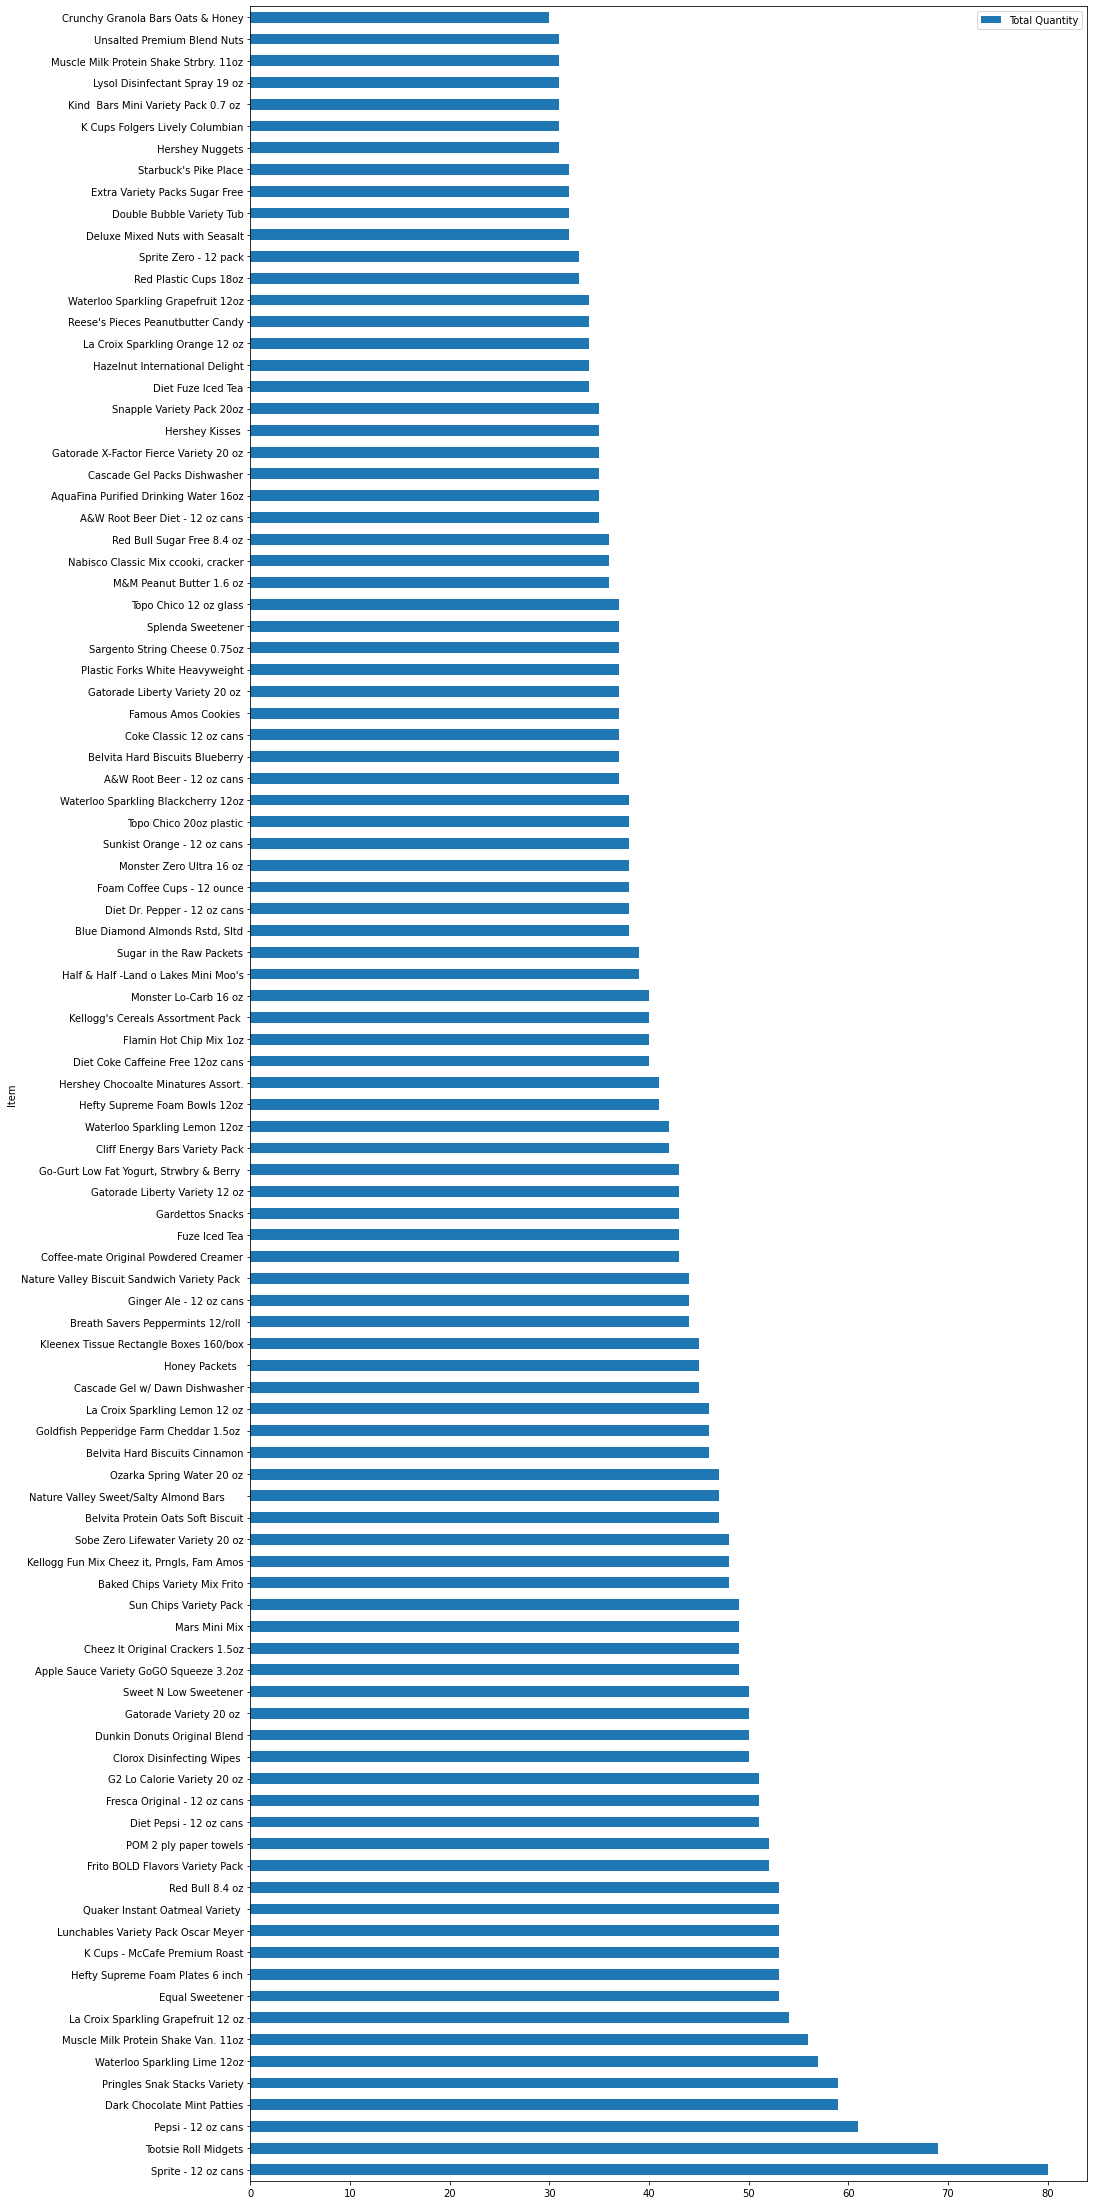

In [40]:
df_Q5 = df.head(100)
df_Q5.plot.barh(x='Item', y='Total Quantity', figsize=(15,40), rot=0)

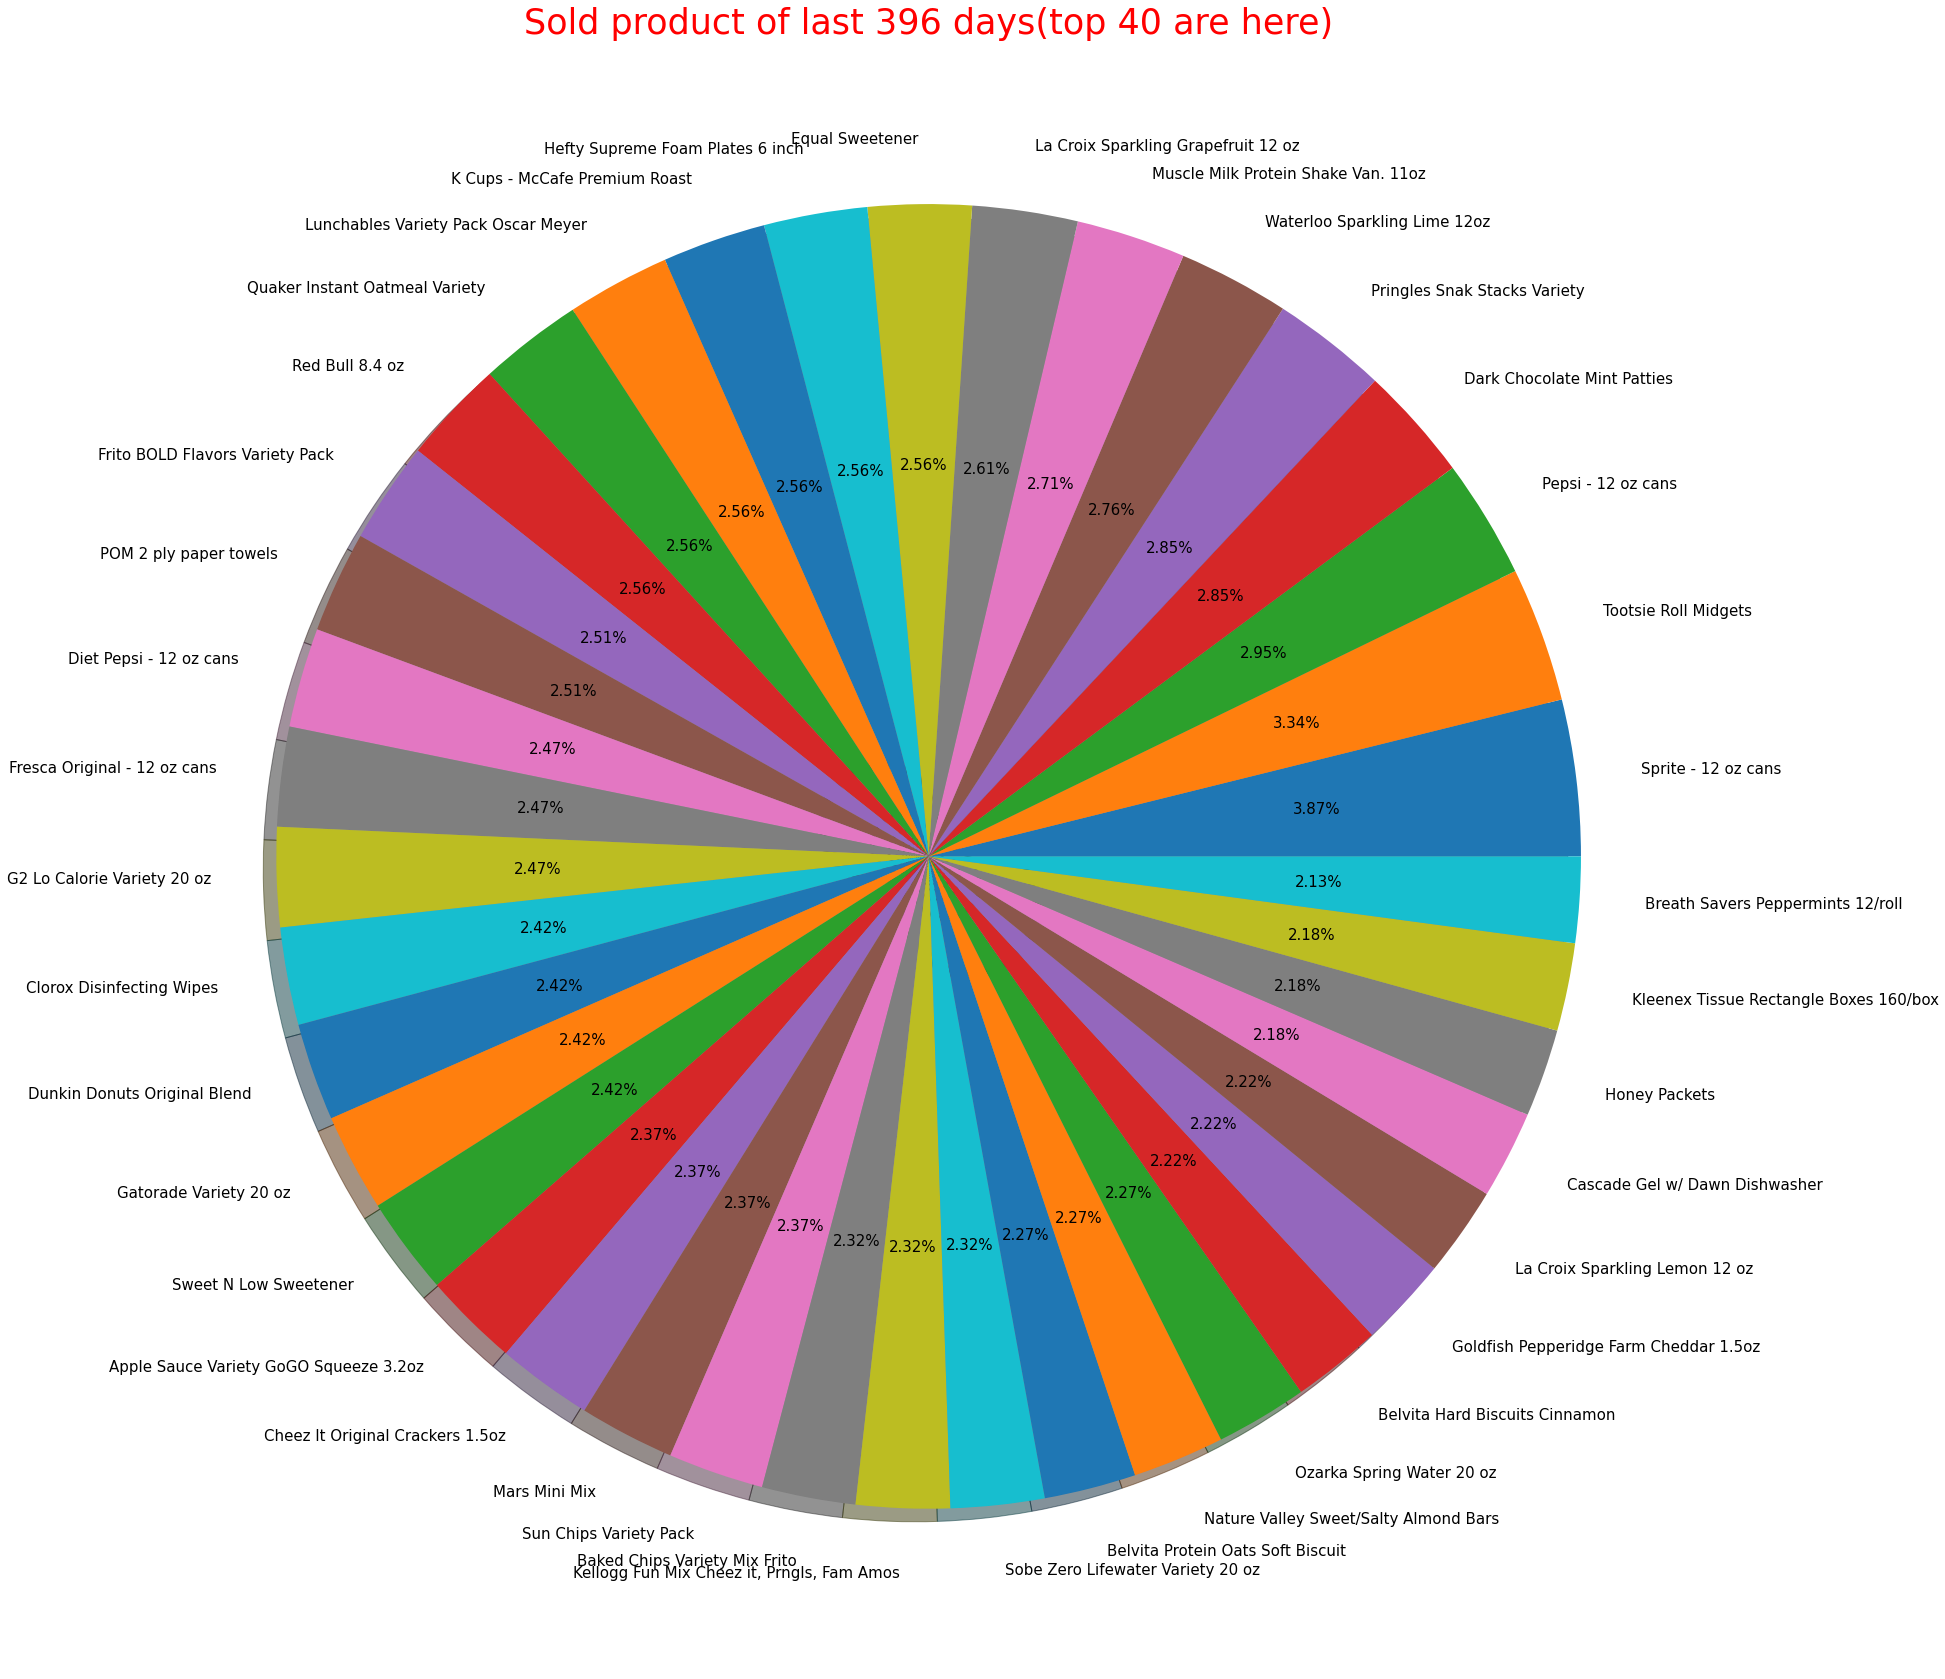

In [50]:

df_Q5 = df_Q5.head(40)
labels=df_Q5['Item']
data = df_Q5['Total Quantity']
textprops = {"fontsize":15}

# explode=(0.1, 0.1,0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1)
# colors=colors
# colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige",'salmon','palegreen','skyblue','plum','pink')
plt.title('Sold product of last 396 days(top 40 are here)',loc='center',color='r', size=35)

plt.pie(data, labels=labels, shadow = True, textprops = textprops, autopct='%.2f%%')
# plt.figure(figsize=(20,12)) 
plt.rcParams["figure.figsize"] = (30,30)
plt.show()
